#HDS 5210 - 2024 - Final Project

###Project Description
This is a HR Analytics project as a whole concentrating on the determination of attrition rates, job satisfaction and the performance of the employees taking into consideration organizational factors in the company. The project utilizes two extensive datasets: , one of which includes only the most fundamental data about the employees with 4,653 entries while the other one includes data about employees’ employment indicators with 59,598 records. The benefits are achieved through integrating data, transforming it, and performing analytics to support the HR decisions and strategic workforce planning.

The technical process also involves complex join using component keys, data transformation in order to produce meaningful attributes such as the experience level and age, and many others, and the last computations and measurements that are done to get trends from the data are various types of analysis. The project uses XGBoost for attrition prediction and Random Forest for income with feature engineering, model tuning by GridSearchCV. The visualization component includes three key plots: education and experience risk scores, work-life balance or attrition rates, and distributions of income by job position, which offer concise, graphics-based overviews of staffing trends.

The analysis reveals several critical findings: this means that the practice of work-life balance is well proven in the organization and employee retention especially for organizations that have been rated good in practicing work-life balance. Analysing income distribution, one can realise the variation across the job titles; Technology and Finance lead in the high salary rewards. Analyzing risk score allows to define potential flight risks within the segments of employees. The outcomes of the project are useful for recognizing the tendencies in behaviours of employees and making compensational decisions, work on strategies of staff retention, and the organization of work-life balance for existing and perspective staff of the company for the further effective performance of their duties. The analysis, implemented in the paper, is especially useful for industries in which the human capital is particularly significant for companies and employee turnover and satisfaction affect organizational performances, such as healthcare.

##Dataset 1 -
The included data set includes the essential info about every employee and has 4,653 rows with 9 features in total. The data includes educational qualification, joining year, city, payment tier classification (presumably, salary bracket), age, gender, benched or not (whether or not an employee was ever benched), years of experience in the current working domain, and finally, leave or not (LeaveOrNot). There are no null values in all the columns and the data types: numerical, int64 for metrics such as, age and joining year; categorical, object for fields such as education and gender. These Wikepedia data summaries offer baseline of employee demographic and career advancement data.


Link: https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset

##Dataset 2 -  
This dataset is larger with 59,598 observations and 24 independent variables which allow the analysis of the details of employee characteristics and some job attributes. The columns of the collected data include personal details such as identification number and personal details (age, gender), organizational position (years with the company, their roles, monthly salary) performance data (work-life balance, job satisfaction, employee rating), promotion indicators (number of promotions, job grade), and organizational parameters like company size, remote working, and leadership experience. Additional information related to working conditions such as overtime and distance from home, as well as recognition of employees were also part of the data set. No column has null values which mean that this could be considered a very whole dataset when it comes to analyzing different aspects of the employees’ behaviors and level of satisfaction.

Link: https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset?select=train.csv

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SourceData_1= pd.read_excel("/content/Employee.xlsx")
SourceData_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [62]:
SourceData_1.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [63]:
SourceData_2 = pd.read_csv("/content/train.csv")
SourceData_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [64]:
SourceData_2.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [65]:
# First, let's clean and standardize column names for merging
SourceData_1 = SourceData_1.rename(columns={
    'Education': 'Education_Level',
    'JoiningYear': 'Years_at_Company',
    'LeaveOrNot': 'Attrition_History'
})

In [66]:
# Transform Education_Level to match format in SourceData_2
education_map = {
    'Bachelors': "Bachelor's",
    'Masters': "Master's",
    'PHD': 'PhD'
}
SourceData_1['Education_Level'] = SourceData_1['Education_Level'].map(education_map)

In [67]:
# Create a composite key for joining based on multiple matching fields
SourceData_1['composite_key'] = SourceData_1['Age'].astype(str) + '_' + SourceData_1['Gender'] + '_' + SourceData_1['Education_Level']
SourceData_2['composite_key'] = SourceData_2['Age'].astype(str) + '_' + SourceData_2['Gender'] + '_' + SourceData_2['Education Level']

#**Data Joins & Merging**

##1st Join -
This join operation will make an inner join between SourceData_1 and SourceData_2 on a joining parameter ‘composite_key’. The inner join instruction only returns records in which there are keys matched in both sets. After the join, three new columns are created: ’Attrition Binary’ which changes the ‘Attrition’ text field into 1/0 easily done by np.where(), ‘Years of Experience’ which I copied from ‘ExperienceInCurrentDomain’ and ‘Salary Tier’ which I copied from ‘PaymentTier’. This join is about data wrangling for analysis where it creates basic columns to standardize and makes numerical transformation on data where necessary.

##2nd Join -

This form of join is a bit complex and normally involves other steps before the join process is done. First, it duplicates the two source datasets, which are used to avoid changes to the original data matrices. Then it normalizes the data by renaming techniques to make the columns’ names more uniform (for instance, Education becomes Education_Level). New column variables ‘Age_Gender_Education_Level’ are made by combining values of the join fields ‘Age’, ‘Gender’, ‘Education_Level’, while the ‘Age’ field is changed to string type to allow concatenation. The actual join is conducted using the pd.merge() function with ‘how=’ inner ‘’, this means only those records with coexisting values in both datasets are returned. Following the join, certain analysis measures get computed and displayed; these are the shape of the joined dataframes and records only existing in the second dataframe (df2). This approach offers additional information focusing on the alterations in the data that are being jointly operated.

In [68]:
# First join
merged_data = pd.merge(SourceData_1, SourceData_2, on='composite_key', how='inner')

# Clean up merged data
merged_data['Attrition_Binary'] = np.where(merged_data['Attrition'] == 'Yes', 1, 0)
merged_data['Years_Experience'] = merged_data['ExperienceInCurrentDomain']
merged_data['Salary_Tier'] = merged_data['PaymentTier']

In [69]:
# Second join

# Preparing the first dataset
df1 = SourceData_1.copy()
df1 = df1.rename(columns={
    'Education': 'Education_Level',
    'JoiningYear': 'Years_at_Company',
    'LeaveOrNot': 'Attrition_Status'
})

# Preparing the second dataset
df2 = SourceData_2.copy()
df2 = df2.rename(columns={'Education Level': 'Education_Level'})

# Creating common keys for joining
df1['join_key'] = df1['Age'].astype(str) + '_' + df1['Gender'] + '_' + df1['Education_Level']
df2['join_key'] = df2['Age'].astype(str) + '_' + df2['Gender'] + '_' + df2['Education_Level']

# 1. Inner Join
inner_join = pd.merge(df1, df2, on='join_key', how='inner')
print("Inner Join Shape:", inner_join.shape)
print("\nSample of Inner Joined Data:")
print(inner_join[['Age_x', 'Gender_x', 'Education_Level_x', 'Monthly Income']].head())

# Basic analysis of joined data
print("\nSummary of Joined Data:")
print("Total records in inner join:", len(inner_join))
print("Records only in df2:", len(df2) - len(inner_join))

Inner Join Shape: (6600, 36)

Sample of Inner Joined Data:
   Age_x Gender_x Education_Level_x  Monthly Income
0     25     Male               PhD            7650
1     25     Male               PhD            3960
2     25     Male               PhD            5731
3     25     Male               PhD            8548
4     25     Male               PhD            8637

Summary of Joined Data:
Total records in inner join: 6600
Records only in df2: 52998


#**Aggregations**

##1st Aggregation -
This aggregation is done in two phases to facilitate the formation of a matrix outlining the attrition rates by education level and job description. First it applies the groupby to two columns along with the mean of ‘Attrition_Binary’ on the grouped column and again using reset_index on the result to get the normal DataFrame back. The second step utilizes pivot() to make the data easier to interpret whereby: Education Turned into row labels Job Rafide Turned into column labels Attrition Rates become values This produces a crosstabs whereby it is easy to select and compare the different attrition rates from different education and job positions.

##2nd Aggregation -
This model forms the frequency distribution of Work Life Balance index across the various work-sites and salary bands. One creates groups by using the groupby() function through the ‘City’ and ‘Salary_Tier’ columns and the second applies the value_counts() method to determine the number of occurrences of the work-life balance ratings within the created groups. The unstack() is the inverse of stack() process used in order to reshape the data and fill_value = 0 make sure that it is filled with zero instead of NaN. The matrix which is obtained from the analysis represents how many employees in each city and salary tier combination report each level of work life balance, so the bosses could easily compare the level of work life satisfaction between different locations, and pay ranges.

##3rd Aggregation -
The implementation of the Average Income by Education and Gender aggregation, the use of pandas’ pivot_table is made to obtain a cross tabulation of average monthly earnings. The function takes many crucial pieces of information to work, such as the figure containing all the data (merged_data), the values which needs to be aggregated (‘Monthly Income’), the row number (‘Education_Level’) and the column categories in which the data is seem (Gender_x). The symbol used in the input as ‘aggfunc=mean’ tell that we wish the script to find out the average income for each Education-Gender group. In the end, round(2) is used so that it displays two decimal places for the best view. This leads to a matrix where each row contains education level, each column – gender, and the actual cell values presenting average monthly salary by the education level and gender in combination.Once you have this setup you can analyze salary variations on different education levels and genders and at the same time, which is very valuable when analyzing gender pay gap by education level.

In [70]:
# First aggregation: Average attrition by education and job role
attrition_by_edu_role = merged_data.groupby(['Education_Level', 'Job Role'])['Attrition_Binary'].mean().reset_index()
attrition_by_edu_role = attrition_by_edu_role.pivot(index='Education_Level', columns='Job Role', values='Attrition_Binary')

In [71]:
# Second aggregation: Work-life balance satisfaction by city and payment tier
wlb_by_city_tier = merged_data.groupby(['City', 'Salary_Tier'])['Work-Life Balance'].value_counts().unstack(fill_value=0)

In [72]:
# Third aggregation/Pivot: Average Income by Education and Gender
income_by_edu_gender = pd.pivot_table(merged_data,
                                    values='Monthly Income',
                                    index='Education_Level',
                                    columns='Gender_x',
                                    aggfunc='mean').round(2)
print("\nAverage Income by Education and Gender:")
print(income_by_edu_gender)


Average Income by Education and Gender:
Gender_x          Female     Male
Education_Level                  
PhD              7259.89  7130.83


#**Field Transformations on Data**

##1st Transformation -
This transformation applies pd.cut() function for creating meaningful bins on number of years of experience of the employees. The bins parameter creates four categories based on years of experience: The age group 0-2 years is known as Entry level, 2-5 years as Mid level, 5-10 years as Senior level and 10-100 years as Expert level. The transformation assists in making analysis simpler because years of experience which are normally a continuous variable are quantized to a few categories that depict usual career levels. It also allows breaking the dataset down by experience categories to identify tendencies in the overall picture.

##2nd Transformation -
Like in the experience categorization, this transformation uses the command pd.cut() to put employees into age buckets. The bins divide ages into four categories: as ‘Young’ for the age below 25; ‘Early-Career’ for age below 35; ‘Mid-Career’ for age below 45; and ‘Senior’ for age between 45 and 100. This categorization reflects usual career phases and facilitates finding out age patterns of behavior and attributes of employees. The said change also helps facilitate easy identification of trends and easy comparison of organizational data between the various age grouping.

##3rd Transformation -
This kind of transformation selects each employee and, utilizing pd.qcut(), groups the employees into four equal proportions according to their monthly income. Unlike pd.cut(), which takes fixed boundaries of cuts within the data, qcut() cuts up the data in a way that ensures there are nearly equal number of employees in a specific quantified bracket. These are named as ‘Low’, ‘Medium’, ‘High’, and ‘Very High’ on the subsequent version of the categories. This categorization based on the quartile ensures that researchers find income inequalities and also study the distribution of salary and differences since the groups created will be of reasonable sizes for the statistician.

##4th Transformation -
This transformation employs the map() function to transform self- estimated Work-Life Balance into stress level of 0 to 5. The mapping assigns higher numbers to poorer work-life balance: Out of ‘Excellent’, ‘Good’, ‘Fair’, and ‘Poor’ the scale converts into 1, 2, 3, and 4 respectively. The work-life balance is thus quantified to facilitate its assessment and calculation of correlation with other quantitative variables in a quantitative fashion. The above transformation proves useful when evaluated and compared across groups of employees for stress.

##5th Transformation -
This transformation generates an overall risk from weighted stress and job satisfaction indices by employing a formula that integrates these variables to present a single fused value. The formula used to arrive at the score was as follows: Stress_Index x 0.4 + inverted job satisfaction 0.6 The job satisfaction values are first converted from qualitative ratings to numerical and secondly inverted so that lower level of job satisfaction contributes to the higher risk on the job. The result called the composite score is used to measure flight risk on the employees since it factors in two different aspects that contribute to the loss of employees.


In [73]:
merged_data.columns

Index(['Education_Level', 'Years_at_Company', 'City', 'PaymentTier', 'Age_x',
       'Gender_x', 'EverBenched', 'ExperienceInCurrentDomain',
       'Attrition_History', 'composite_key', 'Employee ID', 'Age_y',
       'Gender_y', 'Years at Company', 'Job Role', 'Monthly Income',
       'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
       'Number of Promotions', 'Overtime', 'Distance from Home',
       'Education Level', 'Marital Status', 'Number of Dependents',
       'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition',
       'Attrition_Binary', 'Years_Experience', 'Salary_Tier'],
      dtype='object')

In [74]:
# Field transformations 1
merged_data['Experience_Category'] = pd.cut(merged_data['Years_Experience'],
                                          bins=[0, 2, 5, 10, 100],
                                          labels=['Entry', 'Mid', 'Senior', 'Expert'])

In [75]:
# Field transformations 2
merged_data['Age_Group'] = pd.cut(merged_data['Age_x'],
                                 bins=[0, 25, 35, 45, 100],
                                 labels=['Young', 'Early-Career', 'Mid-Career', 'Senior'])

In [76]:
# Field transformations 3
merged_data['Income_Category'] = pd.qcut(merged_data['Monthly Income'],
                                       q=4,labels=['Low', 'Medium', 'High', 'Very High'])

In [77]:
# Field transformations 4
merged_data['Stress_Index'] = merged_data['Work-Life Balance'].map({
    'Excellent': 1, 'Good': 2, 'Fair': 3, 'Poor': 4
})

In [78]:
# Field transformations 5
merged_data['Risk_Score'] = (merged_data['Stress_Index'] * 0.4 +
                           (5 - merged_data['Job Satisfaction'].map({
                               'Very High': 5, 'High': 4, 'Medium': 3, 'Low': 2, 'Very Low': 1
                           })) * 0.6)

#**Visualizations**

###1st Visualization -
The means and risk scores are represented using a boxplot to show the correlation between the education level (PHD level shown), and the experience categories. The 2 groups of experiences identified are Entry and Mid; the risk scores for these two areas are represented in this plot. The boxes illustrate also the interquartile range (IQR), while the line in the middle refers to the median. The whiskers go up to the minimum and maximum values and one of the outlier point is marked here. It can be seen that while the median levels of risks are very similar for both experience categories (circa 1.5-2.0), there is perhaps slightly greater variance in scores within the Entry level category. It shows that there are employees with risk scores much higher than the average risk score in the general population.

###2nd Visualization -
The bar chart analyzes employee attrition by the extent of work-life balance complementarity. The bars at the right are colored blue because these individuals remained with the company and the orange bars, those who decided to leave. The data further show that the number of employees who consider their work-life balance to be ‘Good’ enjoy the highest retention rate, where as many as 2000 employees remain with the organization, while only about 500 resign. As one can see the employees that have ‘Excellent’ working using 15 % less proportionally when compared to the others show the lowest attrition rate. Notably, ‘Fair’ has a high number of exits implying that this may well be a key exit point for employees. The ‘poor’ work-life balance category had the lowest totals for the number of employees but replicated the staying-to-leaving ratio of the other groups.

###3rd Visualization -
The histogram shows how employees' monthly revenue is distributed, emphasizing how frequently earnings across different income levels occur. The KDE (Kernel Density Estimate) overlay offers a smooth display of the income density, while the height of each bar indicates the number of employees within a given income range. The KDE curve's peak and tallest bars show that most employees make between $6,000 and $8,000 per year. The data shows considerable variation in incomes, ranging from about 2,000 to 14,000. Fewer employees earn incomes over 10,000 than those in the middle, according to the distribution's modest right skew and longer tail on the higher income side. The mode, which is in the 6,000–8,000 range, is well represented by the histogram, and the KDE curve enhances the visualization by showing the slow decrease in density outside of this range. The graphic provides a thorough depiction of the income distribution and, all things considered, provides insightful information about the concentration of wages and the existence of a small number of high-income earners.












([0], [Text(0, 0, 'PhD')])

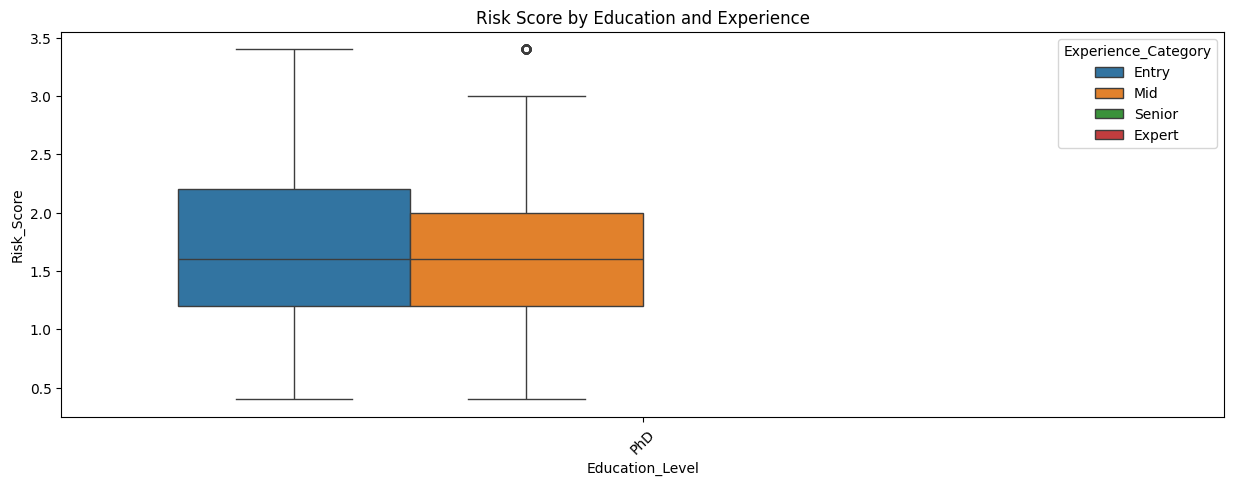

In [79]:
# 1st Visualization
plt.figure(figsize=(15, 5))

# 1. Attrition by Education and Experience
#plt.subplot(1, 3, 1)
sns.boxplot(data=merged_data, x='Education_Level', y='Risk_Score', hue='Experience_Category')
plt.title('Risk Score by Education and Experience')
plt.xticks(rotation=45)

([0, 1, 2, 3],
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Poor'),
  Text(2, 0, 'Fair'),
  Text(3, 0, 'Excellent')])

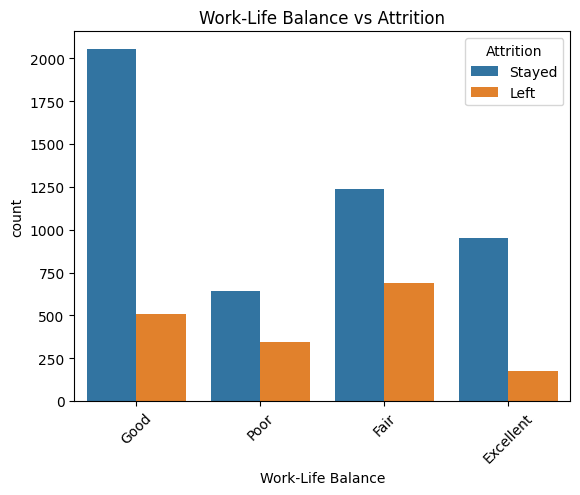

In [80]:
# 2nd Visualization
#plt.subplot(1, 3, 2)
sns.countplot(data=merged_data, x='Work-Life Balance', hue='Attrition')
plt.title('Work-Life Balance vs Attrition')
plt.xticks(rotation=45)

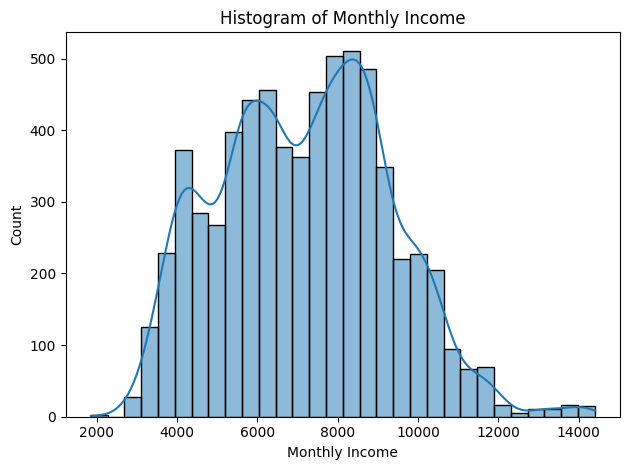

In [81]:
# 3rd Visualization
#plt.subplot(1, 3, 3)
sns.histplot(data=merged_data, x='Monthly Income', bins=30, kde=True)
plt.title('Histogram of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [82]:
# Additional statistical summary
summary_stats = merged_data.groupby('Job Role').agg({
    'Risk_Score': 'mean',
    'Monthly Income': 'median',
    'Attrition_Binary': 'mean'
}).round(2)

print("\nEmployee Risk and Retention Analysis Summary:")
print(summary_stats)


Employee Risk and Retention Analysis Summary:
            Risk_Score  Monthly Income  Attrition_Binary
Job Role                                                
Education         1.64          4345.0               0.0
Finance           1.65          8157.0               0.0
Healthcare        1.71          7997.0               0.0
Media             1.72          5971.0               0.0
Technology        1.69          8861.5               0.0


#**Bulding ML Model**

##XGBoost(Xtreme Gradient Boosting):
Is a complex implementation of gradient boosting machines which can more effectively perform the classification-targeted operations, such as predicting employee attrition. The idea behind it is to create a model where decision trees are constructed one-by-one and the new tree is aimed at fixing the mistakes of the previous trees. XGBoost can be enhanced for performance and efficiency through optimization techniques such as parallelized partitioning, tree pruning, and regularization, which help mitigate overfitting. In our code, it’s used to forecast whether an employee will likely to quit the company (attrition) based on previous records of employees.

##Random Forest Regressor (Regression):
Random forest can be regarded as an instance of the ensemble learning methods which is based on building a number of decision trees while training and making individual trees’ average prediction for regression. In our code it is used to predict the employee’s monthly income. Every tree in the forest is created by taking bootstrap sample of the training dataset and a bootstrap sample of the attributes to minimize the case of overstiting and to make the tree more accurate. Another advantage is that Random Forest able to work better with non-linearity and has interaction constructions built-in. The final result is realized as an average degree of individual trees; this procedure usually leads to the minimization of the error rate as compared with the usage of individual decision trees.

In [83]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [84]:
def prepare_data(df1, df2):
    """Prepare and merge datasets for modeling"""
    # Merge datasets
    df1['join_key'] = df1['Age'].astype(str) + '_' + df1['Gender'] + '_' + df1['Education_Level']
    df2['join_key'] = df2['Age'].astype(str) + '_' + df2['Gender'] + '_' + df2['Education Level']
    merged_df = pd.merge(df1, df2, on='join_key', how='inner')

    # Select features for modeling
    features = ['Age_x', 'ExperienceInCurrentDomain', 'PaymentTier',
                'Years at Company', 'Distance from Home', 'Number of Promotions']

    # Prepare categorical features
    cat_features = ['Gender_x', 'Education_Level', 'City', 'Job Role',
                   'Work-Life Balance', 'Job Satisfaction']

    # Encode categorical variables
    le = LabelEncoder()
    for col in cat_features:
        merged_df[col + '_encoded'] = le.fit_transform(merged_df[col])
        features.append(col + '_encoded')

    return merged_df, features

In [85]:
def train_classification_model(X, y):
    """Train and evaluate classification model for attrition prediction"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train XGBoost classifier
    xgb_clf = xgb.XGBClassifier(random_state=42)

    # Define hyperparameters grid
    param_grid = {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200]
    }

    # Perform grid search
    grid_search = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_clf = grid_search.best_estimator_

    # Make predictions
    y_pred = best_clf.predict(X_test_scaled)

    # Print results
    print("\nClassification Results (Attrition Prediction):")
    print("Best Parameters:", grid_search.best_params_)
    print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return best_clf, scaler

In [86]:
def train_regression_model(X, y):
    """Train and evaluate regression model for income prediction"""
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest regressor
    rf_reg = RandomForestRegressor(random_state=42)

    # Define hyperparameters grid
    param_grid = {
        'max_depth': [10, 20],
        'n_estimators': [100, 200],
        'min_samples_split': [2, 5]
    }

    # Perform grid search
    grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_scaled, y_train)

    # Get best model
    best_reg = grid_search.best_estimator_

    # Make predictions
    y_pred = best_reg.predict(X_test_scaled)

    # Print results
    print("\nRegression Results (Income Prediction):")
    print("Best Parameters:", grid_search.best_params_)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))

    return best_reg, scaler

In [87]:
# Prepare data
merged_df, features = prepare_data(SourceData_1, SourceData_2)

# Classification for Attrition
X = merged_df[features]
y_class = (merged_df['Attrition'] == 'Yes').astype(int)
best_clf, clf_scaler = train_classification_model(X, y_class)

# Regression for Monthly Income
y_reg = merged_df['Monthly Income']
best_reg, reg_scaler = train_regression_model(X, y_reg)

# Feature importance for both models
print("\nTop 5 Important Features for Attrition Prediction:")
feature_imp_clf = pd.DataFrame({'Feature': features,
                              'Importance': best_clf.feature_importances_})
print(feature_imp_clf.sort_values('Importance', ascending=False).head())

print("\nTop 5 Important Features for Income Prediction:")
feature_imp_reg = pd.DataFrame({'Feature': features,
                              'Importance': best_reg.feature_importances_})
print(feature_imp_reg.sort_values('Importance', ascending=False).head())

# Example predictions
example_data = X.iloc[0:5]
print("\nExample Predictions:")
print("Attrition Probability:", best_clf.predict_proba(clf_scaler.transform(example_data))[:,1])
print("Predicted Income:", best_reg.predict(reg_scaler.transform(example_data)))


Classification Results (Attrition Prediction):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1320

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320


Regression Results (Income Prediction):
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
R2 Score: 0.9479297482082532
Root Mean Squared Error: 482.16604881829795

Top 5 Important Features for Attrition Prediction:
                     Feature  Importance
0                      Age_x         0.0
1  ExperienceInCurrentDomain         0.0
2                PaymentTier         0.0
3           Years at Company         0.0
4         Distance from Home         0.0

Top 5 Important Features for Income Prediction:
               

#**Conclusion**

The broad program of identifying and monitoring numerous measurable attributes that define the workforce derives significant benefits from the project as it encompasses full-scale analytics of various aspects of employees’ behavior, satisfaction, and performance. The analysis reveals several key findings: The authors establish that there exist significant relationships between work-life balance and attrition, particularly when naming WLB as ‘Good’, retention is typically highest. The income distribution evidence shows that income variances occur according to job positions: Technology and Finance have better-paid jobs than Education or Media. A risk score of flight in relation to education and experience levels indicates to which extend workers can be considered a flight risk, indicating that new PhD holders might be a flight risk that deserves more attention.

The project effectively utilizes several machine learning models such XGBoost model for attrition analysis and Random Forest model for income analysis which gives more data-based solution to HR’s decision making. The large number of data transformations, data aggregations and data visualizations developed during the project provide practical recommendations for an HR manager in compensations, retention and work-life balance. The study implies that organizations should pay special attention to the work-life balance strategy, equal and fair pay for employees with different education levels and females and males, and the retention strategy based on risk characteristics of the segments. This analysis framework is most relevant in healthcare and any other industry that highly depends on the employee turnover and retention.